In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Orders.csv')
df.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [3]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 29 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [4]:
df_clean=df.dropna(subset=['City'])
df_clean = df_clean.drop(df_clean[(df_clean['City'] < '\u4e00' )].index).drop(df_clean[(df_clean['City'] > '\u9fff' )].index)
def new_city(city):
    if city =='桃園縣':
        return '桃園市'
        
    elif city == '台北縣':        
        return  '新北市'
        
    elif city == '台東市':
        return  '台東縣'
            
    elif city == '屏東市':        
        return  '屏東縣'
        
    elif city == '台南縣':        
        return  '台南市'
    else:
        return city
df_clean['City']=df_clean['City'].apply(new_city)
df_clean.groupby(by='City')['Quantity'].sum()

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東縣      35217
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東縣     125897
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599553
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

## 區分單筆消費購買數量大於1的族群
1. buyone  單次購買一件
2. buymore 單次購買兩件以上

In [5]:
buyone=df_clean[df_clean['Quantity'] == 1]
buyone

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
5,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457792,1256479,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
6,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457793,1256508,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
7,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457794,1256548,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
8,20150703,1388127,b'q4P\xfd\xf2\x98\x13\xe0\x83\x06\x01\xea\x8du...,Web,Mobile,Family,4457847,1221909,True,False,...,台南市,東區,701.0,全家台南崇德店,7140,Family,Finish,NaN,NaN,2015-07-03
9,20150703,1388127,b'q4P\xfd\xf2\x98\x13\xe0\x83\x06\x01\xea\x8du...,Web,Mobile,Family,4457848,1221913,True,False,...,台南市,東區,701.0,全家台南崇德店,7140,Family,Finish,NaN,NaN,2015-07-03


In [6]:
buymore=df_clean[df_clean['Quantity'] > 1]
buymore

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
239,20150703,1388493,b'\x18\xc8\x12\x80\xdb\xa6\x01T\xfdk\xe95\x9dG...,Web,PC,SevenEleven,4459690,1221985,True,False,...,台中市,大雅區,428.0,綠點門市,953076,SevenEleven,Finish,NaN,NaN,2015-07-03
281,20150703,1379172,b'!\xfe%tB\xb3\x04\xb8oM;C\r\xe2J\x014\xab&\xab',Web,Mobile,Family,4458633,1119555,True,False,...,桃園市,蘆竹區,338.0,全家蘆竹洛陽店,5546,Family,Finish,NaN,NaN,2015-07-03
440,20150626,1358942,b'\xa8\x07p6p=I\x9a#m\xf6\x15\x0b\xd7\xd7\xfd^...,Web,PC,SevenEleven,4338940,1208715,True,False,...,苗栗縣,苗栗市,360.0,福華門市,113366,SevenEleven,Finish,NaN,NaN,2015-06-26
457,20150713,1443370,"b""!\xc4\xb4\xc2\x9c\xaa\xc4>o\xa1mZw'\x8a\x8b'...",Web,Mobile,SevenEleven,4678764,1194582,True,False,...,新北市,蘆洲區,247.0,池田門市,139379,SevenEleven,Finish,NaN,NaN,2015-07-13
461,20150713,1443215,b'\xc5T^\xc5\xbf\xe1\x95\xdf!\x06\x9c\xb2Ca\xe...,Web,PC,Family,4680164,1242940,True,False,...,新北市,土城區,236.0,全家土城御昇店,13921,Family,Finish,NaN,NaN,2015-07-13
522,20150713,597357,b'\xaa\xebu\xeeyI_\xcf+:\xd4\x1b\xb2\x00\xcd\x...,Web,Mobile,SevenEleven,4680708,1119544,True,False,...,嘉義縣,中埔鄉,606.0,雲海門市,968311,SevenEleven,Finish,NaN,NaN,2015-07-13
524,20150713,289403,b'P\xf4\xa3\x14\x13\xb6\x16\xa5\xfb\xae\xd7\xd...,AndroidApp,Mobile,SevenEleven,4679719,1221985,True,False,...,台南市,南區,702.0,新府緯門市,982236,SevenEleven,Finish,NaN,NaN,2015-07-13
539,20150713,1442525,b'^\xa5 Q\xc1\x1c\xa0\xee\xf10\xc2\xed\xd9\x0e...,Web,Mobile,SevenEleven,4678989,1208716,True,False,...,台北市,士林區,111.0,天裕門市,164559,SevenEleven,Finish,NaN,NaN,2015-07-13
540,20150713,1442525,b'^\xa5 Q\xc1\x1c\xa0\xee\xf10\xc2\xed\xd9\x0e...,Web,Mobile,SevenEleven,4678990,1270582,True,False,...,台北市,士林區,111.0,天裕門市,164559,SevenEleven,Finish,NaN,NaN,2015-07-13
541,20150713,1442525,b'^\xa5 Q\xc1\x1c\xa0\xee\xf10\xc2\xed\xd9\x0e...,Web,Mobile,SevenEleven,4678991,1119555,True,False,...,台北市,士林區,111.0,天裕門市,164559,SevenEleven,Finish,NaN,NaN,2015-07-13


## buyone與buymore在每個縣市的分布數量作圖

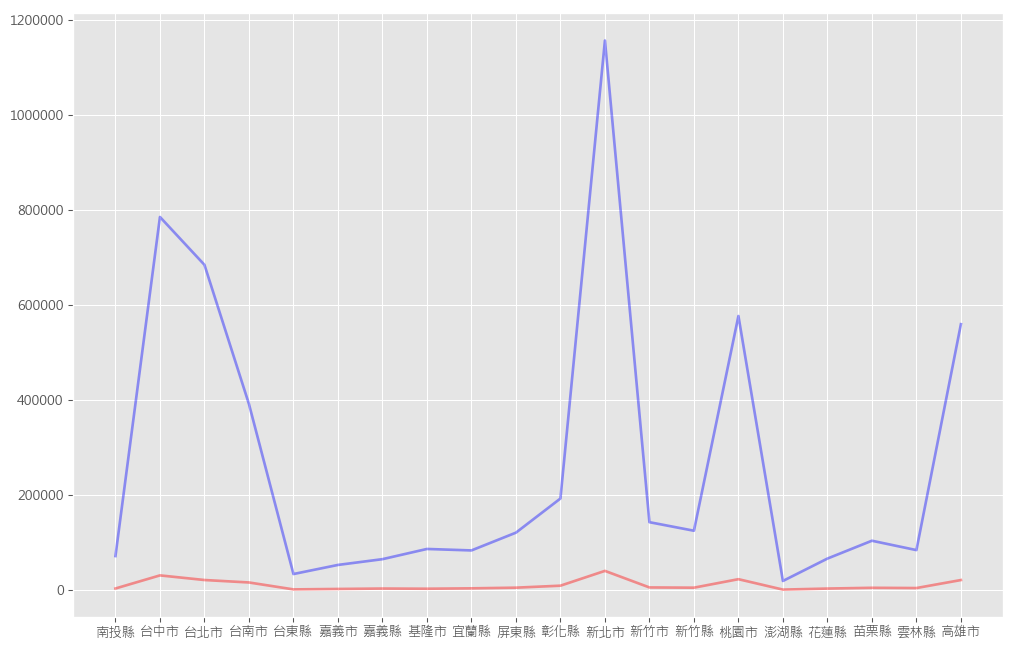

In [11]:
my_dpi=96
plt.figure(figsize=(1200/my_dpi, 800/my_dpi), dpi=my_dpi)
buyone_city=buyone.groupby(by='City')['Quantity'].sum().to_frame().reset_index()
buymore_city=buymore.groupby(by='City')['Quantity'].sum().to_frame().reset_index()
plt.style.use('ggplot')
plt.plot(buyone_city['City'],buyone_city['Quantity'], marker='', color='blue', linewidth=2, alpha=0.4)
plt.plot(buymore_city['City'],buymore_city['Quantity'], marker='', color='red', linewidth=2, alpha=0.4)

## 區分單筆消費金額大於250的族群
1. rich 單次消費>250
2. poor 單次消費<=250

In [12]:
rich=df_clean[df_clean['SalesOrderSlaveTotalPayment'] > 250]
rich

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
15,20150703,1387512,b'(\xd9\xdc\xa5\x8e\n\x10a\xd9\xaa\xec\xed\x06...,Web,Mobile,Family,4457865,1119469,True,False,...,新北市,新店區,231.0,全家新店新和店,11955,Family,Overdue,NaN,NaN,2015-07-03
19,20150703,1230537,b'\x10\xc6\xad\xf0\xd9C!\x13\xa0\xc6\xb0H\xd2l...,AndroidApp,Mobile,CreditCardOnce,4457912,1194502,True,False,...,新竹市,北區,300.0,NaN,NaN,Home,Finish,NaN,NaN,2015-07-03
21,20150703,1230537,b'\x10\xc6\xad\xf0\xd9C!\x13\xa0\xc6\xb0H\xd2l...,AndroidApp,Mobile,CreditCardOnce,4457914,1194503,True,False,...,新竹市,北區,300.0,NaN,NaN,Home,Finish,NaN,NaN,2015-07-03
24,20150703,1230537,b'\x10\xc6\xad\xf0\xd9C!\x13\xa0\xc6\xb0H\xd2l...,AndroidApp,Mobile,CreditCardOnce,4457917,1221886,True,False,...,新竹市,北區,300.0,NaN,NaN,Home,Finish,NaN,NaN,2015-07-03
25,20150703,1230537,b'\x10\xc6\xad\xf0\xd9C!\x13\xa0\xc6\xb0H\xd2l...,AndroidApp,Mobile,CreditCardOnce,4457918,1221959,True,False,...,新竹市,北區,300.0,NaN,NaN,Home,Finish,NaN,NaN,2015-07-03
26,20150703,1230537,b'\x10\xc6\xad\xf0\xd9C!\x13\xa0\xc6\xb0H\xd2l...,AndroidApp,Mobile,CreditCardOnce,4457919,1221980,True,False,...,新竹市,北區,300.0,NaN,NaN,Home,Finish,NaN,NaN,2015-07-03
27,20150703,1230537,b'\x10\xc6\xad\xf0\xd9C!\x13\xa0\xc6\xb0H\xd2l...,AndroidApp,Mobile,CreditCardOnce,4457920,1256520,True,False,...,新竹市,北區,300.0,NaN,NaN,Home,Cancel,NaN,NaN,2015-07-03
34,20150703,1388164,b'\xa1f\xa6Y\x81\xde\xc4FW\t\tCn\xc7\x9e\xbet\...,Web,PC,Family,4457951,1221890,True,False,...,新北市,淡水區,251.0,全家淡水福春店,5639,Family,Finish,NaN,NaN,2015-07-03
51,20150703,1388120,b'\xe0\x8f\x07I\xc3\xcd\x83\xee\xfb\xcdX*`]\xa...,AndroidApp,Mobile,SevenEleven,4458030,1221940,True,False,...,台南市,新營區,730.0,太子宮門市,116826,SevenEleven,Finish,NaN,NaN,2015-07-03


In [13]:
poor=df_clean[df_clean['SalesOrderSlaveTotalPayment'] <= 250]
poor

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
5,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457792,1256479,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
6,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457793,1256508,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
7,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457794,1256548,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03
8,20150703,1388127,b'q4P\xfd\xf2\x98\x13\xe0\x83\x06\x01\xea\x8du...,Web,Mobile,Family,4457847,1221909,True,False,...,台南市,東區,701.0,全家台南崇德店,7140,Family,Finish,NaN,NaN,2015-07-03
9,20150703,1388127,b'q4P\xfd\xf2\x98\x13\xe0\x83\x06\x01\xea\x8du...,Web,Mobile,Family,4457848,1221913,True,False,...,台南市,東區,701.0,全家台南崇德店,7140,Family,Finish,NaN,NaN,2015-07-03
10,20150703,1388127,b'q4P\xfd\xf2\x98\x13\xe0\x83\x06\x01\xea\x8du...,Web,Mobile,Family,4457849,1221896,True,False,...,台南市,東區,701.0,全家台南崇德店,7140,Family,Finish,NaN,NaN,2015-07-03


## rich與poor在每個縣市的分布數量作圖

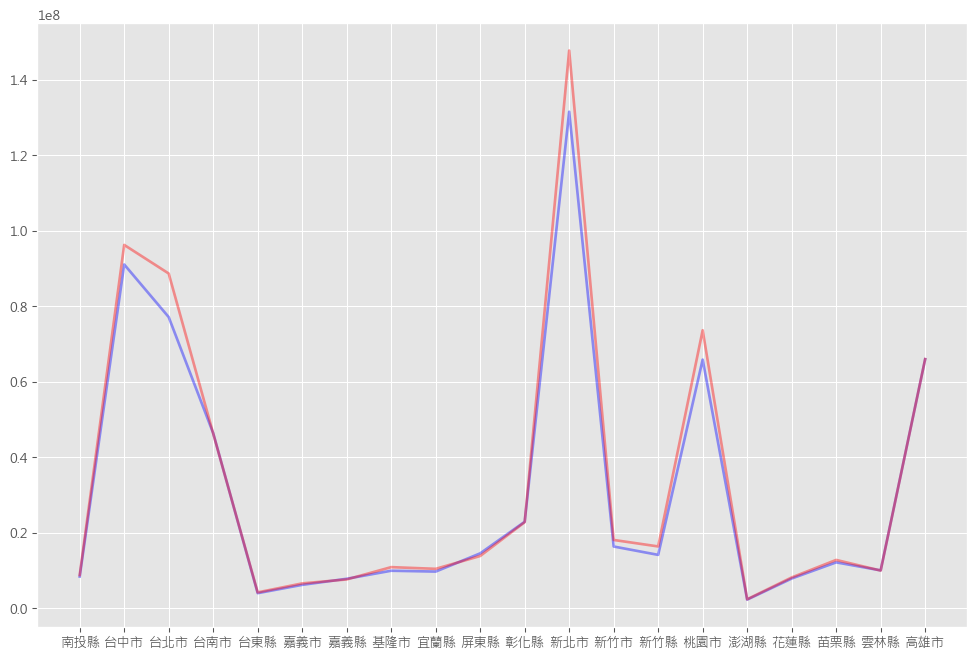

In [15]:
my_dpi=96
plt.figure(figsize=(1200/my_dpi, 800/my_dpi), dpi=my_dpi)
rich_city=rich.groupby(by='City')['SalesOrderSlaveTotalPayment'].sum().to_frame().reset_index()
poor_city=poor.groupby(by='City')['SalesOrderSlaveTotalPayment'].sum().to_frame().reset_index()
plt.style.use('ggplot')
plt.plot(poor_city['City'],poor_city['SalesOrderSlaveTotalPayment'], marker='', color='blue', linewidth=2, alpha=0.4)
plt.plot(rich_city['City'],rich_city['SalesOrderSlaveTotalPayment'], marker='', color='red', linewidth=2, alpha=0.4)